In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import geopandas as gpd

/home/matias/jupyterhub/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [3]:
html2017 = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/sistema-unico-de-atencion-ciudadana/sistema-unico-de-atencion-ciudadana-2017.csv'
html2018 = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/sistema-unico-de-atencion-ciudadana/sistema-unico-de-atencion-ciudadana-2018.csv'
html2019 = 'http://cdn.buenosaires.gob.ar/datosabiertos/datasets/sistema-unico-de-atencion-ciudadana/sistema-unico-de-atencion-ciudadana-2019.csv'

In [41]:
df_2017 = pd.read_csv(html2017, sep = ";")
df_2018 = pd.read_csv(html2018, sep = ",")
df_2019 = pd.read_csv(html2019, sep = ",")

In [42]:
df_2017['fecha_cierre_contacto'] = np.nan
df_2017.columns = df_2018.columns

In [43]:
df = pd.concat([df_2017,df_2018,df_2019])

In [47]:
df.canal = df.canal.apply(str.lower)
df.categoria = df.categoria.apply(str.lower).replace('limpieza y recolección','limpieza y recolección') 


In [48]:
df.head()

,contacto,periodo,categoria,subcategoria,concepto,tipo_prestacion,fecha_ingreso,hora_ingreso,domicilio_cgpc,domicilio_barrio,domicilio_calle,domicilio_altura,domicilio_esquina_proxima,lat,long,canal,genero,estado_del_contacto,fecha_cierre_contacto
0,00005735/17,201701,calles y veredas,REPARACION DE VEREDA,REPARACION DE VEREDA,SOLICITUD,2/1/2017,5:48:31 p.m.,COMUNA 5,BOEDO,GIBSON,4192.0,NaN,-34.638972,-58.422420,web,FEMENINO,ABIERTO,NaN
1,00004008/17,201701,medios de transporte,BICICLETAS,INCONVENIENTES CON ECOBICIS,QUEJA,2/1/2017,1:47:51 p.m.,COMUNA 4,BOCA,"GARCIA, MARTIN AV.",364.0,NaN,-34.628911,-58.369940,147,MASCULINO,ABIERTO,NaN
2,00004187/17,201701,medios de transporte,BICICLETAS,INCONVENIENTES CON ECOBICIS,QUEJA,2/1/2017,2:08:49 p.m.,COMUNA 4,BOCA,"GARCIA, MARTIN AV.",364.0,NaN,-34.628911,-58.369940,147,MASCULINO,ABIERTO,NaN
3,00011267/17,201701,medios de transporte,BICICLETAS,INCONVENIENTES CON ECOBICIS,QUEJA,3/1/2017,4:50:42 p.m.,COMUNA 14,PALERMO,JUNCAL,3102.0,NaN,-34.586084,-58.408411,web,FEMENINO,ABIERTO,NaN
4,00011302/17,201701,limpieza y recoleccion,CESTOS Y CONTENEDORES,INSTALACION/REPARACION DE CONTENEDOR,SOLICITUD,3/1/2017,4:54:36 p.m.,COMUNA 4,PARQUE PATRICIOS,"GARAY, JUAN DE AV.",2158.0,NaN,-34.627586,-58.393497,web,MASCULINO,ABIERTO,NaN


In [30]:
df['canal'] = pd.Categorical(df['canal']) 
df['categoria'] = pd.Categorical(df['categoria'])
df['domicilio_cgpc'] = pd.Categorical(df['domicilio_cgpc'])

In [31]:
dictp = {'porcentaje': '{:.2%}', 'porcentaje_acu':'{:.2%}' }
n = df.contacto.count()

In [32]:
tab = df.pivot_table('contacto', index='canal', aggfunc='count')
tab.assign(porcentaje = tab.contacto/tab.contacto.sum()).style.format(dictp)

,contacto,porcentaje
canal,,
147,1085141,49.07%
app,681041,30.80%
comunas,42499,1.92%
web,402589,18.21%


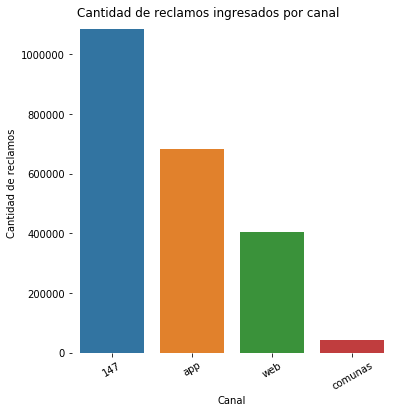

In [33]:
ax=sns.catplot(x ='canal', kind='count',data=df, height=5.5, orient='v', order = ['147', 'app', 'web', 'comunas'], margin_titles= True).set_xticklabels(
    rotation=30).despine(left=True, bottom = True).set_axis_labels('Canal','Cantidad de reclamos')
ax=ax.fig.suptitle('Cantidad de reclamos ingresados por canal')

In [34]:
fig1 = ax.get_figure()
fig1.savefig('graf_canal.png', bbox_inches= 'tight')

In [49]:
tab2 = df.pivot_table('contacto', index= 'domicilio_cgpc', aggfunc='count').sort_values('contacto', ascending = False)
tab2=tab2.assign(porcentaje = tab2.contacto/n)
tab2.assign(porcentaje_acu = tab2.porcentaje.cumsum()).style.format(dictp)

,contacto,porcentaje,porcentaje_acu
domicilio_cgpc,,,
COMUNA 13,224120,10.14%,10.14%
COMUNA 12,208402,9.42%,19.56%
COMUNA 11,202404,9.15%,28.71%
COMUNA 14,179901,8.14%,36.85%
COMUNA 15,174435,7.89%,44.74%
COMUNA 10,157645,7.13%,51.87%
COMUNA 4,152022,6.87%,58.74%
COMUNA 7,142146,6.43%,65.17%
COMUNA 9,130315,5.89%,71.06%


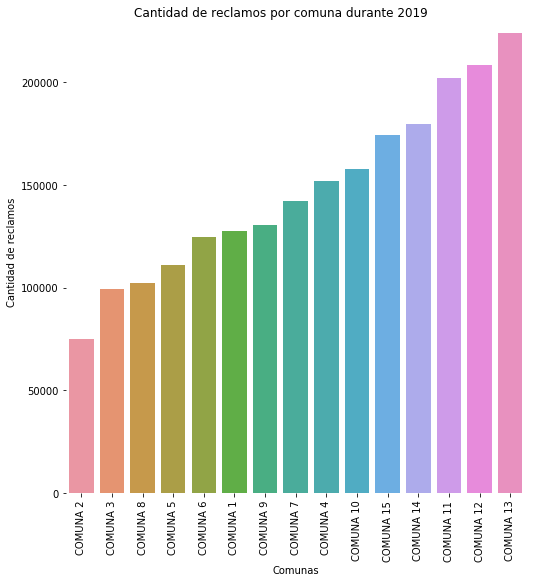

In [36]:
orden1=df['domicilio_cgpc'].value_counts()
orden1=orden1.sort_values()
orden1=orden1.reset_index()
orden1=orden1.iloc[:,0]
orden1=orden1.tolist()

ax2=sns.catplot(x ='domicilio_cgpc', kind='count',data=df, height=7.5,order=orden1, orient='v', margin_titles= True).set_xticklabels(
    rotation=90).despine(left=True, bottom = True).set_axis_labels('Comunas','Cantidad de reclamos')
ax2=ax2.fig.suptitle('Cantidad de reclamos por comuna durante 2019')

In [21]:
fig2 = ax2.get_figure()
fig2.savefig('graf_barrio.png', bbox_inches= 'tight')

In [50]:
tab3 = df.pivot_table('contacto', index = 'categoria', aggfunc='count').sort_values('contacto', ascending = False)
tab3=tab3.assign(porcentaje = tab3.contacto/n)
tab3.assign(porcentaje_acu = tab3.porcentaje.cumsum()).style.format(dictp)

,contacto,porcentaje,porcentaje_acu
categoria,,,
tránsito,512524,23.18%,23.18%
limpieza y recolección,483874,21.88%,45.06%
limpieza y recoleccion,253662,11.47%,56.53%
transito,168762,7.63%,64.16%
arbolado y espacios verdes,165115,7.47%,71.63%
calles y veredas,164338,7.43%,79.06%
alumbrado,105482,4.77%,83.83%
medios de transporte,82857,3.75%,87.58%
trámites y servicios,59382,2.69%,90.26%


In [24]:
barrio = pd.crosstab(df.categoria , df.domicilio_cgpc, dropna = True, margins = True, margins_name='Total')

In [25]:
barrio = pd.crosstab(df.categoria , df.domicilio_cgpc, dropna = True, normalize = 'columns')
barrio.style.format('{:.2%}').highlight_max(color='lightgreen', axis=1)

domicilio_cgpc,COMUNA 1,COMUNA 10,COMUNA 11,COMUNA 12,COMUNA 13,COMUNA 14,COMUNA 15,COMUNA 2,COMUNA 3,COMUNA 4,COMUNA 5,COMUNA 6,COMUNA 7,COMUNA 8,COMUNA 9
categoria,,,,,,,,,,,,,,,
ALUMBRADO,6.17%,5.28%,5.43%,4.88%,3.05%,3.60%,4.04%,3.75%,4.09%,6.60%,3.60%,2.54%,6.72%,6.68%,5.60%
ARBOLADO Y ESPACIOS VERDES,2.51%,10.65%,11.64%,7.58%,5.44%,3.93%,9.27%,3.81%,4.45%,7.37%,6.10%,5.62%,9.11%,7.92%,13.07%
CALLES Y VEREDAS,7.67%,9.18%,7.91%,7.28%,5.56%,5.82%,7.24%,7.92%,8.00%,7.60%,7.61%,7.00%,8.72%,5.96%,9.37%
CEMENTERIOS,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.09%,0.01%,0.00%,0.00%,0.00%,0.00%,0.02%,0.00%,0.00%
"CONTROL EDILICIO, OBRAS Y CATASTRO",2.98%,2.33%,2.60%,2.54%,2.33%,2.63%,2.67%,3.21%,3.10%,2.12%,2.60%,2.76%,2.70%,1.48%,2.50%
FISCALIZACION ACTIVIDADES COMERCIALES,1.62%,0.55%,0.40%,0.36%,0.46%,0.86%,0.56%,1.15%,1.36%,0.51%,0.83%,0.61%,0.74%,0.38%,0.58%
FISCALIZACIÓN ACTIVIDADES COMERCIALES,2.83%,1.03%,0.78%,0.74%,0.89%,1.68%,1.10%,2.03%,2.43%,1.02%,1.56%,1.10%,1.29%,0.77%,1.21%
LIMPIEZA Y RECOLECCION,9.20%,14.15%,14.01%,11.67%,10.21%,9.80%,10.93%,13.60%,10.57%,7.29%,12.85%,12.72%,11.49%,12.27%,12.71%
LIMPIEZA Y RECOLECCIÓN,17.50%,28.08%,26.33%,22.29%,19.57%,19.75%,22.42%,27.04%,20.89%,14.95%,23.04%,22.24%,21.81%,16.62%,26.08%


In [26]:
subca = df['subcategoria']

tablasubca = pd.crosstab([cat,subca], barr, dropna = True)
tablasubca

NameError: name 'cat' is not defined

In [ ]:
est = df['estado_del_contacto']
tablaestado = pd.crosstab(est, barr, dropna = True)#, margins = True
tablaestado.style.highlight_max(color='lightgreen', axis=1).highlight_min(color='#cd4f39', axis=1)

In [ ]:
ax=sns.catplot(x ='estado_del_contacto', kind='count',data=df, height=5.5, orient='v', margin_titles= True).set_xticklabels(
    rotation=30).despine(left=True, bottom = True).set_axis_labels('Estado','Cantidad de reclamos')
ax=ax.fig.suptitle('Cantidad de reclamos estado')